# Stroke Health Care Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("D:\\projects\\DS Internship\\healthcare-dataset-stroke-data.csv")

### Data preprocessing 

In [3]:
df.shape

(5110, 12)

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

only in bmi missing values are present.

In [8]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

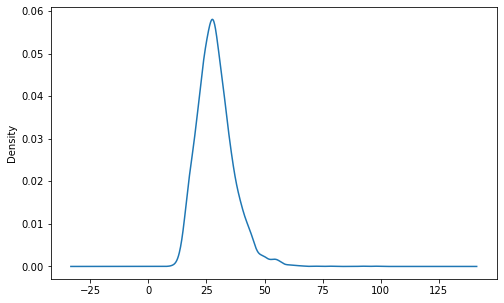

In [10]:
plt.figure(figsize=(8,5))
df['bmi'].plot(kind='kde')
plt.show()

### Replacing Missing Values

In [11]:
df['bmi'].fillna(df['bmi'].median(),inplace=True)

In [12]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
df.drop(['id'],axis=1,inplace=True)

In [14]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## EDA

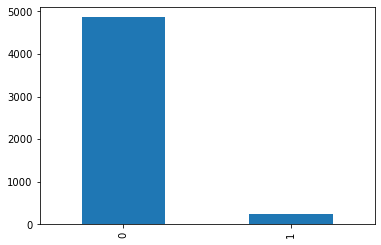

In [15]:
df['stroke'].value_counts().plot(kind='bar')
plt.show()

In [16]:
n=df.select_dtypes(exclude='object')

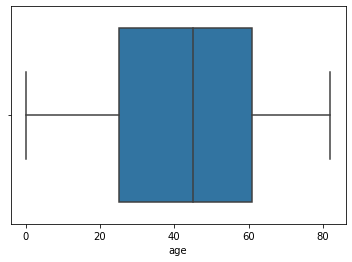

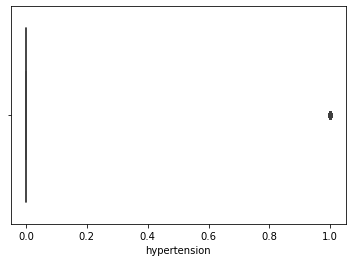

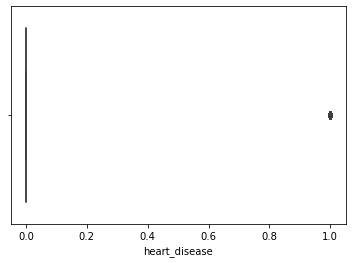

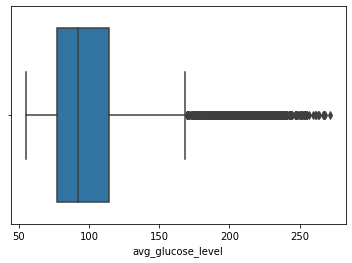

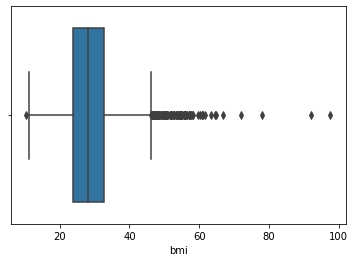

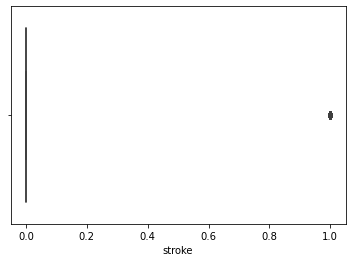

In [17]:
for i in n.columns:
    sns.boxplot(data=n,x=i)
    plt.show()

In [18]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

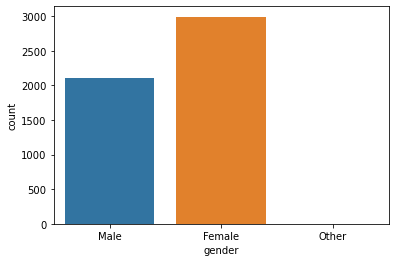

In [19]:
sns.countplot(df['gender'])
plt.show()

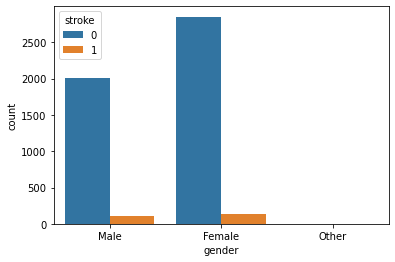

In [20]:
sns.countplot(data=df,x='gender',hue='stroke')
plt.show()

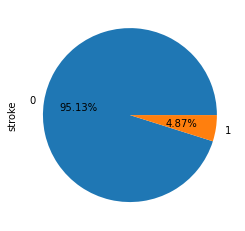

In [21]:
df['stroke'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

In [22]:
df.groupby('gender').mean()[['age','stroke']]

,age,stroke
gender,,
Female,43.757395,0.047094
Male,42.483385,0.051064
Other,26.000000,0.000000


more men had stroke attack than women

In [23]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

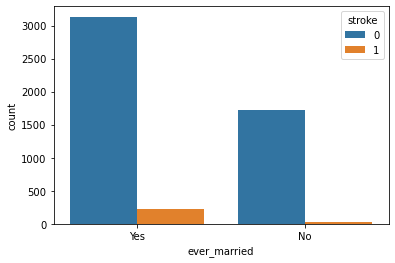

In [24]:
sns.countplot(data=df,x='ever_married',hue='stroke')
plt.show()

In [25]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [26]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

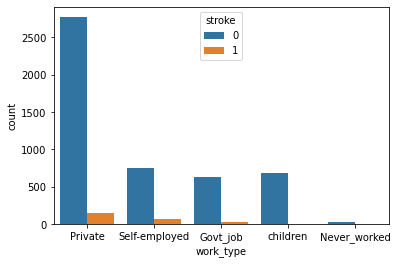

In [27]:
sns.countplot(data=df,x='work_type',hue='stroke')
plt.show()

In [28]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

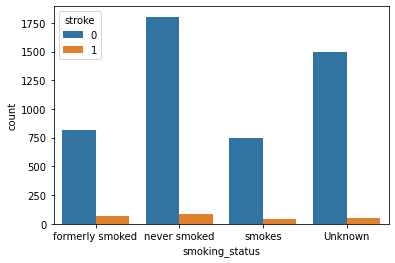

In [29]:
sns.countplot(data=df,x='smoking_status',hue='stroke')
plt.show()

In [30]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [31]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

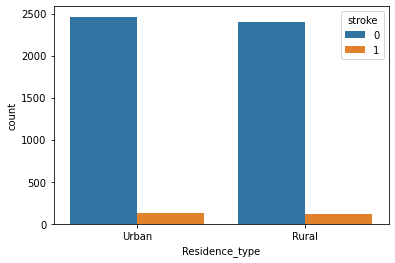

In [32]:
sns.countplot(data=df,x='Residence_type',hue='stroke')
plt.show()

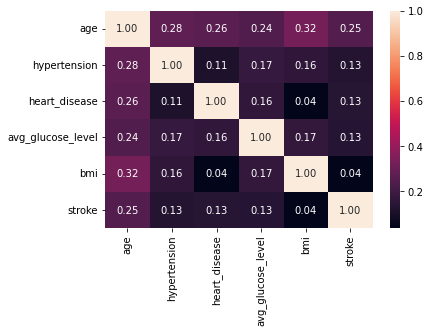

In [33]:
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

In [34]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [35]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()

In [36]:
df['gender']=lr.fit_transform(df['gender'])
df['ever_married']=lr.fit_transform(df['ever_married'])
df['work_type'] =lr.fit_transform(df['work_type'])
df['Residence_type']=lr.fit_transform(df['Residence_type'])
df['smoking_status']=lr.fit_transform(df['smoking_status'])

In [37]:
df.dtypes

gender                 int32
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
work_type              int32
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
stroke                 int64
dtype: object

In [38]:
df.head().values

array([[  1.  ,  67.  ,   0.  ,   1.  ,   1.  ,   2.  ,   1.  , 228.69,
         36.6 ,   1.  ,   1.  ],
       [  0.  ,  61.  ,   0.  ,   0.  ,   1.  ,   3.  ,   0.  , 202.21,
         28.1 ,   2.  ,   1.  ],
       [  1.  ,  80.  ,   0.  ,   1.  ,   1.  ,   2.  ,   0.  , 105.92,
         32.5 ,   2.  ,   1.  ],
       [  0.  ,  49.  ,   0.  ,   0.  ,   1.  ,   2.  ,   1.  , 171.23,
         34.4 ,   3.  ,   1.  ],
       [  0.  ,  79.  ,   1.  ,   0.  ,   1.  ,   3.  ,   0.  , 174.12,
         24.  ,   2.  ,   1.  ]])

In [39]:
stroke_df=df.values
stroke_df

array([[ 1. , 67. ,  0. , ..., 36.6,  1. ,  1. ],
       [ 0. , 61. ,  0. , ..., 28.1,  2. ,  1. ],
       [ 1. , 80. ,  0. , ..., 32.5,  2. ,  1. ],
       ...,
       [ 0. , 35. ,  0. , ..., 30.6,  2. ,  0. ],
       [ 1. , 51. ,  0. , ..., 25.6,  1. ,  0. ],
       [ 0. , 44. ,  0. , ..., 26.2,  0. ,  0. ]])

In [40]:
X =stroke_df[:,0:10] #Predictors
y = stroke_df[:,10] #Target
print(X)
print(y)

[[  1.    67.     0.   ... 228.69  36.6    1.  ]
 [  0.    61.     0.   ... 202.21  28.1    2.  ]
 [  1.    80.     0.   ... 105.92  32.5    2.  ]
 ...
 [  0.    35.     0.   ...  82.99  30.6    2.  ]
 [  1.    51.     0.   ... 166.29  25.6    1.  ]
 [  0.    44.     0.   ...  85.28  26.2    0.  ]]
[1. 1. 1. ... 0. 0. 0.]


In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [43]:
X_train

array([[  0.  ,   3.  ,   0.  , ...,  82.91,  19.9 ,   0.  ],
       [  0.  ,  31.  ,   0.  , ...,  90.  ,  38.6 ,   2.  ],
       [  1.  ,  57.  ,   0.  , ...,  93.04,  29.2 ,   2.  ],
       ...,
       [  1.  ,  69.  ,   0.  , ..., 101.52,  26.8 ,   3.  ],
       [  0.  ,  29.  ,   0.  , ...,  72.52,  33.9 ,   2.  ],
       [  1.  ,  70.  ,   1.  , ...,  74.04,  29.1 ,   2.  ]])

In [44]:
X_train.shape

(3577, 10)

In [45]:
X_test

array([[  1.  ,  78.  ,   0.  , ..., 237.75,  28.1 ,   1.  ],
       [  0.  ,  56.  ,   0.  , ..., 179.14,  35.3 ,   0.  ],
       [  0.  ,  80.  ,   0.  , ...,  57.57,  22.8 ,   2.  ],
       ...,
       [  0.  ,  43.  ,   0.  , ...,  74.86,  26.9 ,   2.  ],
       [  1.  ,   4.  ,   0.  , ...,  81.87,  18.6 ,   0.  ],
       [  0.  ,  38.  ,   1.  , ...,  91.  ,  33.3 ,   2.  ]])

In [46]:
X_test.shape

(1533, 10)

# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
logistic_model = LogisticRegression().fit(X_train,y_train)
ypredicted = logistic_model.predict(X_test)

In [49]:
ypredicted

array([0., 0., 0., ..., 0., 0., 0.])

In [50]:
y_test

array([1., 0., 0., ..., 0., 0., 0.])

# Evaluation for Logistic Regression

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [52]:
print(confusion_matrix(y_test,ypredicted))

[[1460    0]
 [  73    0]]


In [53]:
print(classification_report(y_test,ypredicted))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98      1460
         1.0       0.00      0.00      0.00        73

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533



In [54]:
print('Accuracy score :',accuracy_score(y_test,ypredicted))

Accuracy score : 0.9523809523809523


# KNN Classifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn=KNeighborsClassifier()

In [62]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [63]:
pred=knn.predict(X_test)
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [64]:
y_test

array([1., 0., 0., ..., 0., 0., 0.])

# Evaluation for KNN Classifier

In [65]:
print(accuracy_score(y_test,pred))

0.9445531637312459


# Decision Tree Classifier

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
classifier=DecisionTreeClassifier(max_depth=4)

In [68]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [70]:
Y_pred=classifier.predict(X_test)
Y_pred

array([0., 0., 0., ..., 0., 0., 0.])

# Evaluation for Decision Tree Classifier

In [71]:
print(accuracy_score(y_test,Y_pred))

0.9497716894977168


# Ploting Tree with plot_tree

In [73]:
from sklearn import tree

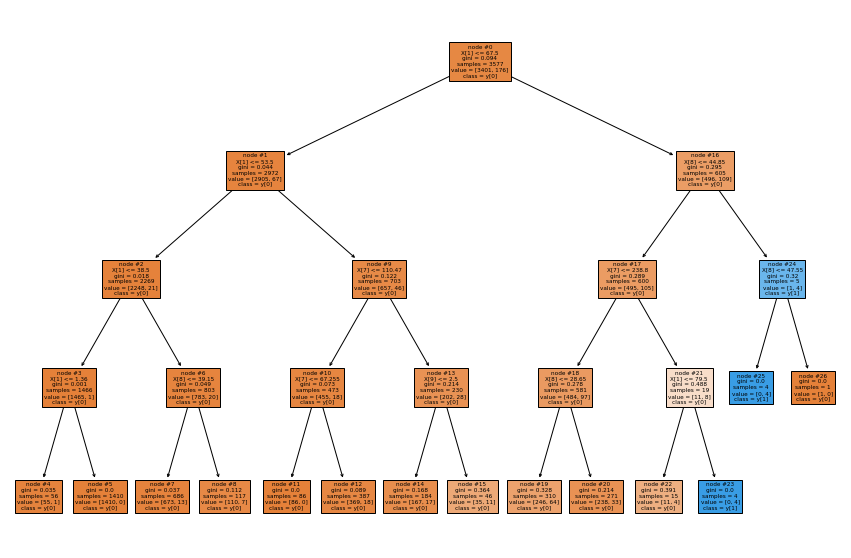

In [77]:
fig=plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True,class_names=True,node_ids=True)
plt.show()

# Random Forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
classifier=RandomForestClassifier()

In [83]:
classifier.fit(X_test,y_test)

RandomForestClassifier()

In [84]:
y_pred=classifier.predict(X_test)
y_pred

array([1., 0., 0., ..., 0., 0., 0.])

In [87]:
y_test

array([1., 0., 0., ..., 0., 0., 0.])

# Evaluation for Random Forest Classifier

In [86]:
print(accuracy_score(y_pred,y_test))

1.0
